In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, GlobalMaxPooling2D
from tensorflow.keras.models import Model
import tensorflow as tf

In [2]:
cifar10 = tf.keras.datasets.cifar10  # Carrega o conjunto de dados 

(x_train, y_train), (x_test, y_test) = cifar10.load_data()  

x_train, x_test = x_train / 255.0, x_test / 255.0  # Normaliza as imagens dividindo por 255, para que os valores de pixels fiquem entre 0 e 1
y_train, y_test = y_train.flatten(), y_test.flatten()  # Achata os arrays de rótulos (eles têm formato (N, 1)) para (N,)

print("x_train.shape: ", x_train.shape)  
print("y_train.shape: ", y_train.shape)  


x_train.shape:  (50000, 32, 32, 3)
y_train.shape:  (50000,)


In [3]:
K = len(set(y_train))
print("numero de classes: ", K)

numero de classes:  10


In [7]:
# Modifiquei os filtros e tamanhos das camadas convolucionais para criar uma estrutura um pouco diferente
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Flatten, Dense, Dropout, BatchNormalization, Activation

# Entrada com shape das imagens (28, 28, 1)
i = Input(shape=x_train[0].shape)

# Camadas convolucionais com BatchNormalization
x = Conv2D(32, (3, 3), strides=2, padding='same')(i)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Conv2D(64, (3, 3), strides=2, padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Conv2D(128, (3, 3), strides=2, padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

# Achatar e adicionar camadas densas
x = Flatten()(x)
x = Dropout(0.4)(x)  # Taxa de dropout ajustada
x = Dense(512, activation='relu')(x)
x = Dropout(0.3)(x)  # Taxa de dropout ajustada
x = Dense(K, activation='softmax')(x)

# Criar o modelo
model = Model(i, x)

# Exibir resumo do modelo
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 16, 16, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 16, 16, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 8, 8, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 8, 8, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 4, 4, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     1,049,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,148,362 (4.38 MB)

 Trainable params: 1,147,914 (4.38 MB)

 Non-trainable params: 448 (1.75 KB)

In [9]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Treinar o modelo
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)

Epoch 1/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.3824 - loss: 1.7418 - val_accuracy: 0.5504 - val_loss: 1.2654
Epoch 2/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.5516 - loss: 1.2492 - val_accuracy: 0.6159 - val_loss: 1.0934
Epoch 3/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.6151 - loss: 1.0825 - val_accuracy: 0.6197 - val_loss: 1.0661
Epoch 4/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.6525 - loss: 0.9837 - val_accuracy: 0.5947 - val_loss: 1.1760
Epoch 5/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.6811 - loss: 0.8966 - val_accuracy: 0.6844 - val_loss: 0.8954
Epoch 6/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.7067 - loss: 0.8276 - val_accuracy: 0.6461 - val_loss: 1.0131
Epoch 7/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 15ms/step - accuracy: 0.7258 - loss: 0.7721 - val_accuracy: 0.7140 - val_loss: 0.8282
Epoch 8/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.7469 -

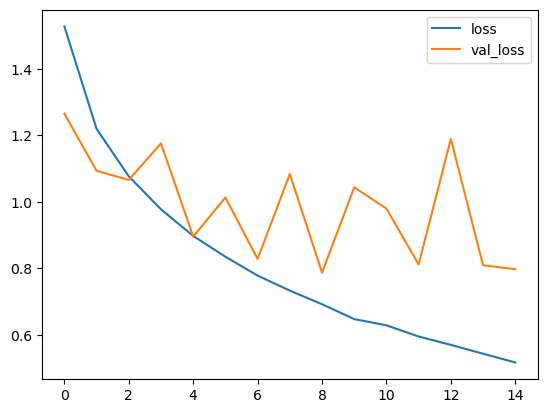

In [10]:
plt.plot(r.history["loss"], label="loss")  # Plota a curva de perda de treinamento usando os valores armazenados em r.history["loss"]
plt.plot(r.history["val_loss"], label="val_loss")  # Plota a curva de perda de validação usando os valores armazenados em r.history["val_loss"]
plt.legend()  

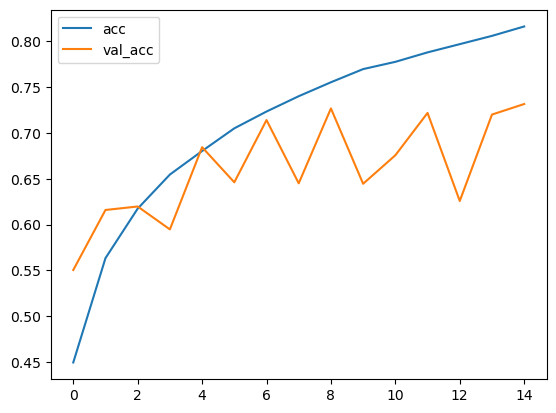

In [11]:
plt.plot(r.history["accuracy"], label="acc")  # Plota a curva de acurácia de treinamento usando os valores armazenados em r.history["accuracy"]
plt.plot(r.history["val_accuracy"], label="val_acc")  # Plota a curva de acurácia de validação usando os valores armazenados em r.history["val_accuracy"]
plt.legend()  